In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Cleaned_Customer.csv')

In [7]:
data

,Unnamed: 0,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,0,1083,79.0,Male,One year,90.038513,3511.502019,No,No,39,No,Electronic check,Yes
1,1,1117,60.0,Female,One year,80.590894,2901.272196,No,Fiber optic,36,No,Bank transfer,Yes
2,2,437,53.0,Female,Two year,98.695968,6513.933908,Yes,No,66,Yes,Bank transfer,No
3,3,3833,84.0,Female,One year,43.042067,1549.514395,No,No,36,No,Mailed check,Yes
4,4,1976,69.0,Male,One year,51.930032,2232.991377,No,No,43,No,Credit card,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,5015,1514,54.0,Male,One year,57.803077,462.424613,No,DSL,8,Yes,Bank transfer,No
4647,5016,2716,45.0,Male,Two year,103.314530,826.516243,No,DSL,8,No,Credit card,No
4648,5017,756,21.0,Female,Two year,103.105344,103.105344,Yes,Fiber optic,1,Yes,Electronic check,Yes
4649,5018,3284,85.0,Male,Two year,36.907180,1660.823112,Yes,Fiber optic,45,Yes,Credit card,Yes


In [9]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
data.sample(5)

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
3823,769,43.0,Male,Two year,71.425428,3285.569684,Yes,Fiber optic,46,No,Bank transfer,Yes
1698,236,85.0,Male,Two year,85.809256,1630.375866,No,No,19,Yes,Credit card,No
1116,2159,44.0,Male,Month-to-month,106.302596,4252.103844,Yes,DSL,40,No,Credit card,No
250,997,51.0,Female,Two year,108.922689,2940.912607,Yes,No,27,No,Electronic check,No
2864,1666,58.0,Male,One year,100.211645,400.846579,Yes,Fiber optic,4,No,Electronic check,Yes


In [13]:
df = data.copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4651 non-null   int64  
 1   Age               4651 non-null   float64
 2   Gender            4651 non-null   object 
 3   ContractType      4651 non-null   object 
 4   MonthlyCharges    4651 non-null   float64
 5   TotalCharges      4651 non-null   float64
 6   TechSupport       4651 non-null   object 
 7   InternetService   4651 non-null   object 
 8   Tenure            4651 non-null   int64  
 9   PaperlessBilling  4651 non-null   object 
 10  PaymentMethod     4651 non-null   object 
 11  Churn             4651 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 436.2+ KB


### Column Types

- **Numerical** - CustomerID,Age,Monthlychargers,Totalcharges,Tenure
- **Categorical** - Gender, ContractType, TechSupport, InternetService, PaperlessBilling,PaymentMethod,Churn

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

### Univariate Analysis on Categorical Columns


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4651 non-null   int64  
 1   Age               4651 non-null   float64
 2   Gender            4651 non-null   object 
 3   ContractType      4651 non-null   object 
 4   MonthlyCharges    4651 non-null   float64
 5   TotalCharges      4651 non-null   float64
 6   TechSupport       4651 non-null   object 
 7   InternetService   4651 non-null   object 
 8   Tenure            4651 non-null   int64  
 9   PaperlessBilling  4651 non-null   object 
 10  PaymentMethod     4651 non-null   object 
 11  Churn             4651 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 436.2+ KB


### Gender
`Conclusion`:-

    - No Missing Values
    - Female Customer are More in number

<Axes: xlabel='Gender', ylabel='count'>

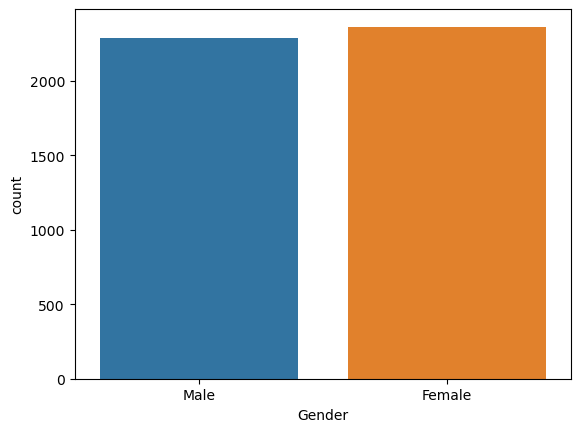

In [19]:
sns.countplot(data=df,x='Gender')

In [20]:
df.Gender.isna().sum()

0

### ContractType:

`Conclusion`:-

    - No Missing Values
    - Converted to new Column ContractType_in_Days which contains the number of days as a contract

In [21]:
df.ContractType.value_counts()

ContractType
One year          1595
Two year          1556
Month-to-month    1500
Name: count, dtype: int64

In [26]:
def conversion_days(data):
    if 'One year' == data:
        return 365
    elif 'Two year' == data:
        return 365*2
    else:
        return 30
days = df.ContractType.apply(conversion_days)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4651 non-null   int64  
 1   Age               4651 non-null   float64
 2   Gender            4651 non-null   object 
 3   ContractType      4651 non-null   object 
 4   MonthlyCharges    4651 non-null   float64
 5   TotalCharges      4651 non-null   float64
 6   TechSupport       4651 non-null   object 
 7   InternetService   4651 non-null   object 
 8   Tenure            4651 non-null   int64  
 9   PaperlessBilling  4651 non-null   object 
 10  PaymentMethod     4651 non-null   object 
 11  Churn             4651 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 436.2+ KB


In [29]:
df.insert(3,'ContractType_In_days',days)

In [31]:
df.drop(columns=['ContractType'],inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4651 non-null   int64  
 1   Age                   4651 non-null   float64
 2   Gender                4651 non-null   object 
 3   ContractType_In_days  4651 non-null   int64  
 4   MonthlyCharges        4651 non-null   float64
 5   TotalCharges          4651 non-null   float64
 6   TechSupport           4651 non-null   object 
 7   InternetService       4651 non-null   object 
 8   Tenure                4651 non-null   int64  
 9   PaperlessBilling      4651 non-null   object 
 10  PaymentMethod         4651 non-null   object 
 11  Churn                 4651 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 436.2+ KB


### TechSupport:

`Conclusion`:-

    - No Missing Values
    - Value are almost divided equally

In [34]:
df.TechSupport.value_counts()

TechSupport
Yes    2338
No     2313
Name: count, dtype: int64

<Axes: ylabel='count'>

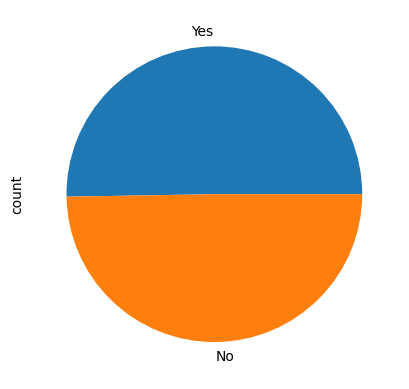

In [36]:
df.TechSupport.value_counts().plot(kind='pie')

### InternetService:

`Conclusion`:-

    - No Missing Values
    - Value are almost divided equally

<Axes: ylabel='count'>

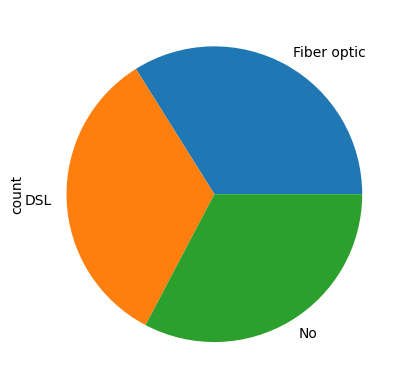

In [38]:
df.InternetService.value_counts().plot(kind = 'pie')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4651 non-null   int64  
 1   Age                   4651 non-null   float64
 2   Gender                4651 non-null   object 
 3   ContractType_In_days  4651 non-null   int64  
 4   MonthlyCharges        4651 non-null   float64
 5   TotalCharges          4651 non-null   float64
 6   TechSupport           4651 non-null   object 
 7   InternetService       4651 non-null   object 
 8   Tenure                4651 non-null   int64  
 9   PaperlessBilling      4651 non-null   object 
 10  PaymentMethod         4651 non-null   object 
 11  Churn                 4651 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 436.2+ KB


###  PaperlessBilling:

    `Conclusion`:-

    - No Missing Values
    - Value are almost divided equally

In [40]:
df.PaperlessBilling.value_counts()

PaperlessBilling
No     2366
Yes    2285
Name: count, dtype: int64

### PaymentMethod:

`Conclusion`:-

    - No Missing Values
    - Value are almost divided equally

<Axes: ylabel='count'>

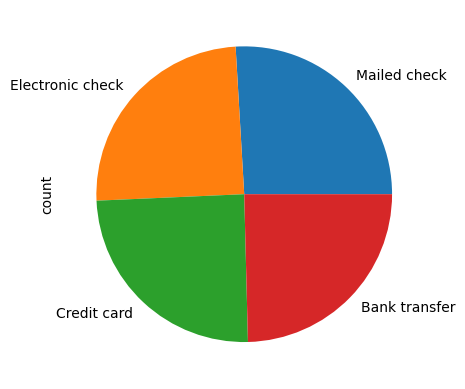

In [42]:
df.PaymentMethod.value_counts().plot(kind='pie')

### Churn:

`Conclusion`:-

    - No Missing Values
    - Value are almost divided equally

In [43]:
df.Churn.value_counts()

Churn
Yes    2374
No     2277
Name: count, dtype: int64

### Univariate Analysis on Numerical columns

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4651 non-null   int64  
 1   Age                   4651 non-null   float64
 2   Gender                4651 non-null   object 
 3   ContractType_In_days  4651 non-null   int64  
 4   MonthlyCharges        4651 non-null   float64
 5   TotalCharges          4651 non-null   float64
 6   TechSupport           4651 non-null   object 
 7   InternetService       4651 non-null   object 
 8   Tenure                4651 non-null   int64  
 9   PaperlessBilling      4651 non-null   object 
 10  PaymentMethod         4651 non-null   object 
 11  Churn                 4651 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 436.2+ KB


### Age:

`Conclusion`:-

    - No Missing Values
    - No Outlier Found

In [45]:
df.Age.describe()

count    4651.000000
mean       53.321221
std        20.679189
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

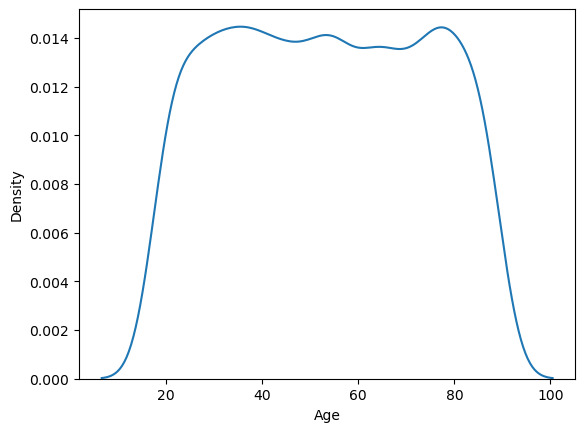

In [47]:
sns.kdeplot(data=df,x='Age')

<Axes: >

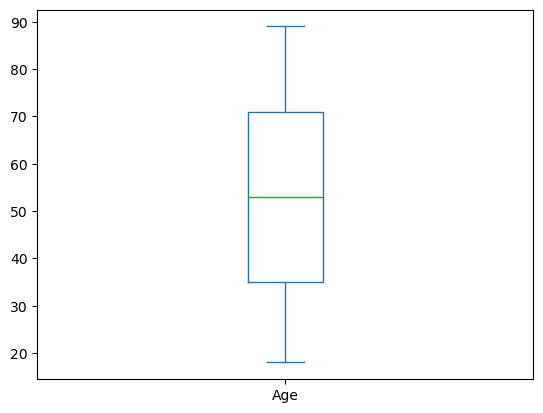

In [48]:
df.Age.plot(kind='box')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4651 non-null   int64  
 1   Age                   4651 non-null   float64
 2   Gender                4651 non-null   object 
 3   ContractType_In_days  4651 non-null   int64  
 4   MonthlyCharges        4651 non-null   float64
 5   TotalCharges          4651 non-null   float64
 6   TechSupport           4651 non-null   object 
 7   InternetService       4651 non-null   object 
 8   Tenure                4651 non-null   int64  
 9   PaperlessBilling      4651 non-null   object 
 10  PaymentMethod         4651 non-null   object 
 11  Churn                 4651 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 436.2+ KB


### MonthlyCharges:

`Conclusion`:-

    - No Missing Values
    - Outliers have been handled

In [50]:
df.MonthlyCharges.describe()

count    4651.000000
mean       71.586361
std        30.894229
min        20.030708
25%        46.904230
50%        71.630182
75%        96.053310
max       394.364052
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

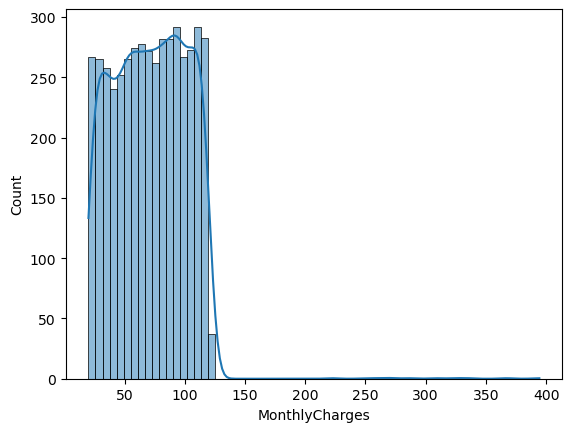

In [52]:
sns.histplot(data=df,x='MonthlyCharges',kde=True)

In [53]:
df.MonthlyCharges.skew()

0.944190282237162

In [61]:
df = df[~(df.MonthlyCharges>200)]

In [62]:
df.MonthlyCharges.skew()

-0.05023282989140127

<Axes: ylabel='MonthlyCharges'>

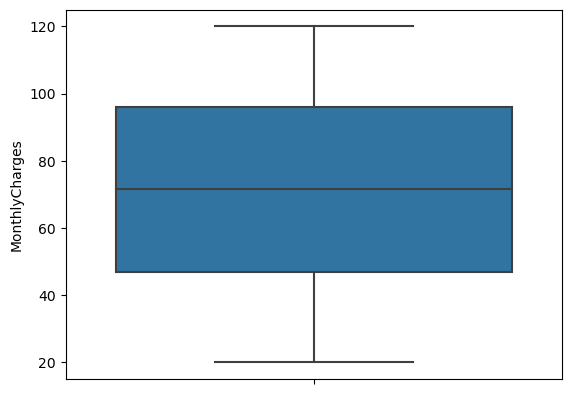

In [65]:
sns.boxplot(data=df,y='MonthlyCharges')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4641 non-null   int64  
 1   Age                   4641 non-null   float64
 2   Gender                4641 non-null   object 
 3   ContractType_In_days  4641 non-null   int64  
 4   MonthlyCharges        4641 non-null   float64
 5   TotalCharges          4641 non-null   float64
 6   TechSupport           4641 non-null   object 
 7   InternetService       4641 non-null   object 
 8   Tenure                4641 non-null   int64  
 9   PaperlessBilling      4641 non-null   object 
 10  PaymentMethod         4641 non-null   object 
 11  Churn                 4641 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 471.4+ KB


### TotalCharges:

`Conclusion`:-

    - No Missing Values
    - Around 250 rows have droped as it contains the outlier values 

In [67]:
df.TotalCharges.describe()

count     4641.000000
mean      2547.948386
std       1926.446844
min          0.000000
25%        981.664836
50%       2106.499950
75%       3788.770844
max      11943.264877
Name: TotalCharges, dtype: float64

In [68]:
df.TotalCharges.skew()

0.7841534300429074

<Axes: xlabel='TotalCharges', ylabel='Count'>

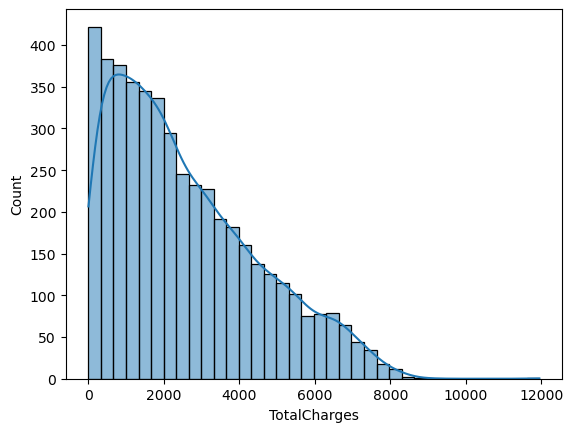

In [70]:
sns.histplot(data=df,x='TotalCharges',kde=True)

In [78]:
df = df[~(df.TotalCharges>6500)]

In [85]:
df = df[~(df.TotalCharges==0)]

In [86]:
df.TotalCharges.skew()

0.6042191935647911

<Axes: >

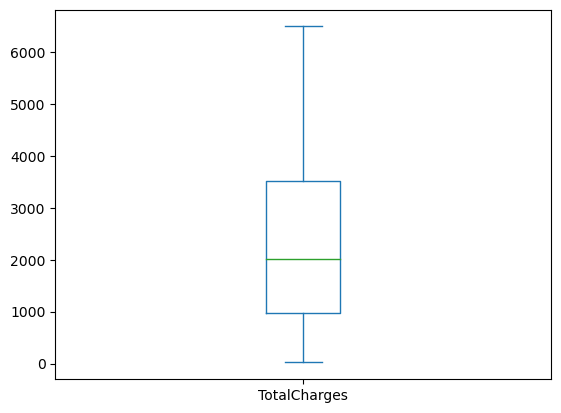

In [87]:
df.TotalCharges.plot(kind='box')

<Axes: xlabel='TotalCharges', ylabel='Count'>

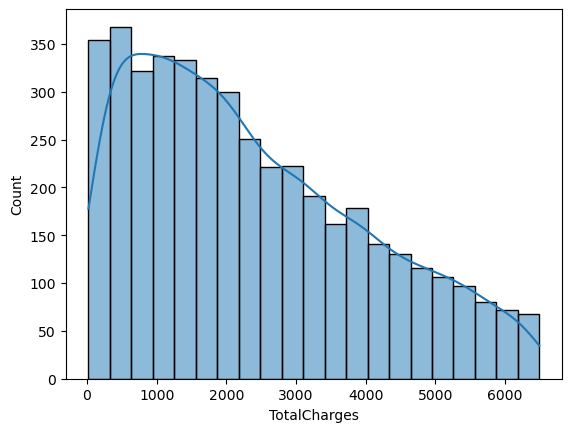

In [88]:
sns.histplot(data=df,x='TotalCharges',kde=True)

In [89]:
df.TotalCharges.describe()

count    4364.000000
mean     2362.864874
std      1665.823190
min        20.099899
25%       980.043353
50%      2020.433565
75%      3514.907060
max      6494.540110
Name: TotalCharges, dtype: float64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


### Tenure:

`Conclusion`:-

    - No Missing Values
    - Value are almost divided equally

In [105]:
df.Tenure.describe()

count    4364.000000
mean       34.683547
std        20.125995
min         1.000000
25%        17.000000
50%        34.000000
75%        52.000000
max        71.000000
Name: Tenure, dtype: float64

<Axes: ylabel='Density'>

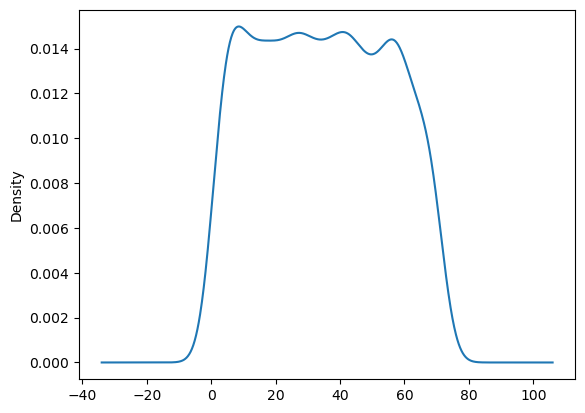

In [107]:
df.Tenure.plot(kind='kde')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


In [109]:
df

,CustomerID,Age,Gender,ContractType_In_days,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1083,79.0,Male,365,90.038513,3511.502019,No,No,39,No,Electronic check,Yes
1,1117,60.0,Female,365,80.590894,2901.272196,No,Fiber optic,36,No,Bank transfer,Yes
3,3833,84.0,Female,365,43.042067,1549.514395,No,No,36,No,Mailed check,Yes
4,1976,69.0,Male,365,51.930032,2232.991377,No,No,43,No,Credit card,No
6,3132,49.0,Male,365,101.524194,913.717747,Yes,DSL,9,Yes,Electronic check,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2133,39.0,Male,365,30.017101,210.119705,No,Fiber optic,7,No,Credit card,Yes
4646,1514,54.0,Male,365,57.803077,462.424613,No,DSL,8,Yes,Bank transfer,No
4647,2716,45.0,Male,730,103.314530,826.516243,No,DSL,8,No,Credit card,No
4648,756,21.0,Female,730,103.105344,103.105344,Yes,Fiber optic,1,Yes,Electronic check,Yes


### Bivariate Analysis

##### Categorical - Categorical

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


## Gender and TechSupport
 --> Females Likes to support the tech

In [115]:
pd.crosstab(df.Gender,df.TechSupport)

TechSupport,No,Yes
Gender,,
Female,1090,1137
Male,1087,1050


<Axes: xlabel='TechSupport', ylabel='Gender'>

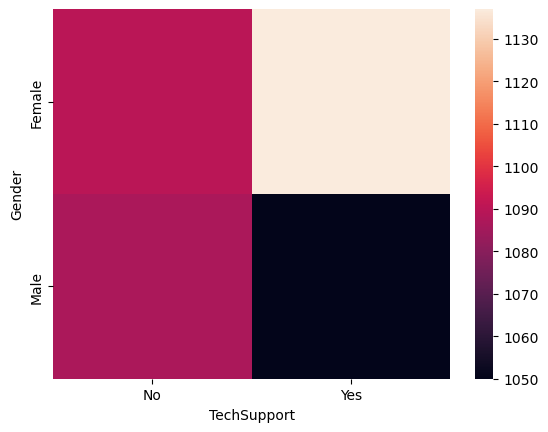

In [114]:
sns.heatmap(pd.crosstab(df.Gender,df.TechSupport))


## Gender and InternetService


In [124]:
pd.crosstab(df.Gender,df.InternetService)

InternetService,DSL,Fiber optic,No
Gender,,,
Female,730,773,724
Male,745,694,698


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


## Gender and PaymentMethod,PaperlessBilling


In [126]:
pd.crosstab(df.Gender,df.PaymentMethod)

PaymentMethod,Bank transfer,Credit card,Electronic check,Mailed check
Gender,,,,
Female,537,557,556,577
Male,541,531,523,542


<Axes: xlabel='PaperlessBilling', ylabel='Gender'>

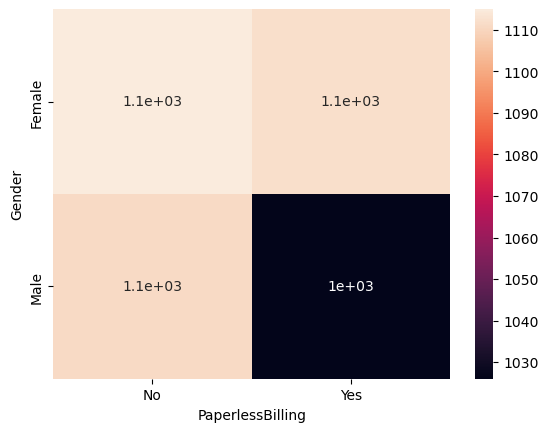

In [128]:
sns.heatmap(pd.crosstab(df.Gender,df.PaperlessBilling),annot=True)

## Churn and Gender

    --> Generally females are not statisfied with the services provided by the company

In [155]:
pd.crosstab(df.Churn,df.Gender)

Gender,Female,Male
Churn,,
No,1092,1039
Yes,1135,1098


#####  Numerical - Categorical

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


### Gender and Age

<Axes: xlabel='Age', ylabel='Count'>

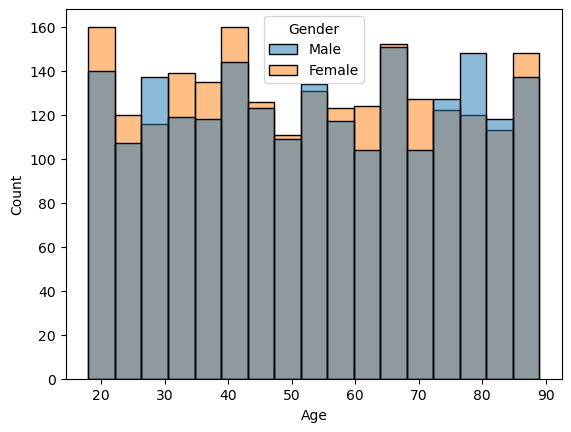

In [137]:
sns.histplot(data=df,x='Age',hue='Gender')

In [133]:
df.sample(5)

,CustomerID,Age,Gender,ContractType_In_days,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
3607,4406,21.0,Male,30,89.551048,805.959429,Yes,DSL,9,No,Credit card,No
4179,2011,85.0,Male,730,91.927139,5055.992618,Yes,Fiber optic,55,Yes,Bank transfer,Yes
4560,3453,46.0,Male,365,118.828859,5347.298652,No,No,45,No,Mailed check,Yes
3544,2667,36.0,Female,30,47.225436,377.803488,No,No,8,No,Bank transfer,No
4110,1430,88.0,Female,365,22.864593,297.239711,Yes,Fiber optic,13,Yes,Credit card,Yes


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


### Gender and Contracttype in days


<Axes: xlabel='ContractType_In_days', ylabel='Density'>

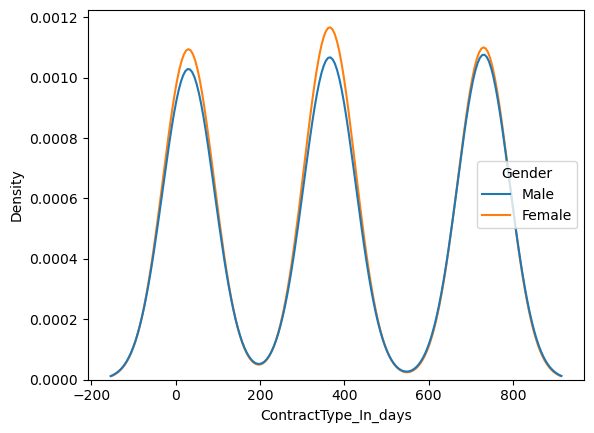

In [144]:
sns.kdeplot(data=df,x='ContractType_In_days',hue='Gender')

### TotalCharges and  InternetService


In [150]:
df[['InternetService','TotalCharges']].groupby('InternetService').mean()

,TotalCharges
InternetService,
DSL,2427.036222
Fiber optic,2308.772171
No,2352.106266


<Axes: xlabel='InternetService'>

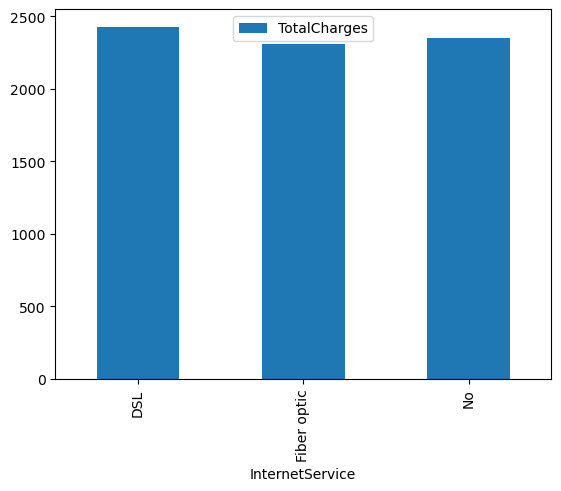

In [152]:
df[['InternetService','TotalCharges']].groupby('InternetService').mean().plot(kind='bar')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


## Churn and MonthlyCharges

In [161]:
df.Churn.value_counts()

Churn
Yes    2233
No     2131
Name: count, dtype: int64

In [162]:
df[['Churn','MonthlyCharges']].groupby('Churn').mean()

,MonthlyCharges
Churn,
No,69.526712
Yes,69.070298


## Numerical and Numerical

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4364 non-null   int64  
 1   Age                   4364 non-null   float64
 2   Gender                4364 non-null   object 
 3   ContractType_In_days  4364 non-null   int64  
 4   MonthlyCharges        4364 non-null   float64
 5   TotalCharges          4364 non-null   float64
 6   TechSupport           4364 non-null   object 
 7   InternetService       4364 non-null   object 
 8   Tenure                4364 non-null   int64  
 9   PaperlessBilling      4364 non-null   object 
 10  PaymentMethod         4364 non-null   object 
 11  Churn                 4364 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 443.2+ KB


<Axes: xlabel='TotalCharges', ylabel='Tenure'>

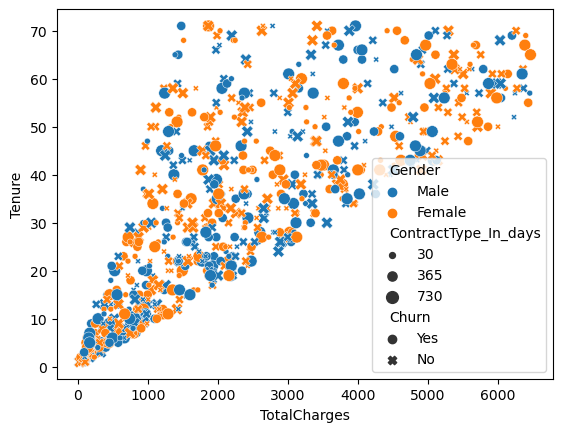

In [174]:
sns.scatterplot(data=df.sample(700),x='TotalCharges',y='Tenure',hue='Gender',style='Churn',size='ContractType_In_days')

In [175]:
data = df

In [176]:
data.to_csv('EDA_Customer.csv')